In [29]:
import astropy.io.fits as fits
from astropy.wcs import WCS
import matplotlib.patches as patches
from astropy.io import fits

import numpy as np
import pylab
from matplotlib import pyplot as plt
%matplotlib notebook
import scipy
from astropy import units as u

In [30]:
path = 'C:\\Users\kyssu\Downloads\H8_continuum.pbcor.fits'
image = fits.getdata(path)
header = fits.getheader(path)
pixel = header['CDELT1']*3600

In [33]:
beam_unit = header['BUNIT']

In [34]:
bmaj = header['BMAJ']
bimn = header['BMIN']

In [32]:
header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  288                                                  
NAXIS2  =                  288                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   6.752061181598E-04                                                  
BMIN    =   5.309024122026E-04                                                  
BPA     =  -8.687633514404E+

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


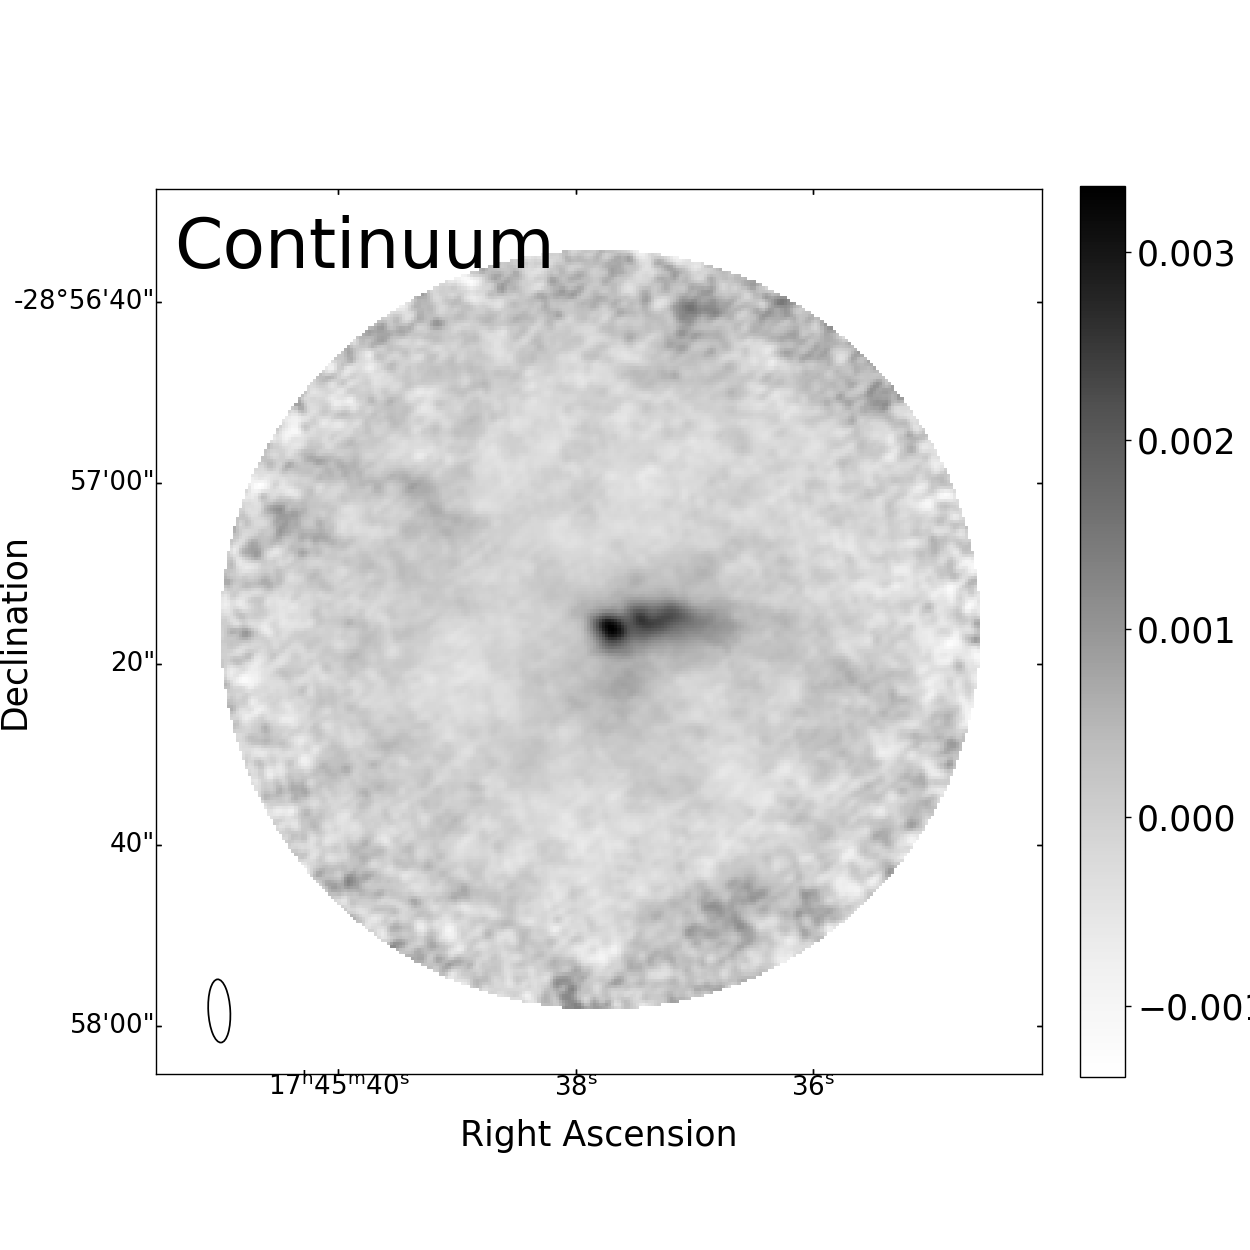

In [40]:
w1 = WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
image_2D = pylab.squeeze(image)
fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=w1)
RA=ax1.coords[0]
DEC = ax1.coords[1]

im1 = plt.imshow(image_2D,cmap='Greys')

RA.set_ticks(size=-3)
DEC.set_ticks(size=-3)

pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                             
pylab.ylabel('Declination',fontsize=20,labelpad=0)                                
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)                     
pylab.annotate(s='Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction")   
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04) # Define a color bar
cb.set_label(label='Flux Density (Jy / beam)',fontsize=25,rotation=270,labelpad=30) 
cb.ax.tick_params(which = 'major', labelsize = 20)

bmaj = header['BMAJ']*3600
bimn = header['BMIN']*3600
bpa = header['BPA']
ax1.add_patch(
            patches.Ellipse(
                (20,20),                            #central position to plot
                bmaj/pixel,bmin/pixel,angle=bpa+90, #ellipse parameters
                fill=False,                         # remove background fill
                color='black'
            ))

In [43]:
#Jy/beam to K
to_K = 1.224e6/(header['RESTFRQ'])**2/bmin/bmaj/3600**2

In [44]:
to_K

4.605489931806792e-25

In [48]:
K = u.brightness_temperature(header['RESTFRQ']*u.Hz)